# Multipoles

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [2]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Turn on interactive plots.
%matplotlib notebook

# Turn off interactive plots.
#%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [4]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w,stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")
    
def draw_potential(x,y,v,levels = 10):
    x = X[:,:,100]
    y = Y[:,:,100]
    v = V[:,:,100]
    
    fig, ax1 = plt.subplots(dpi=150)
    ax1.set_aspect("equal")
    ax1.set_title(r"$V(x,y)$")
    ax1 = plt.contour(x,y,v,levels)
    ax1.clabel()

<IPython.core.display.Javascript object>


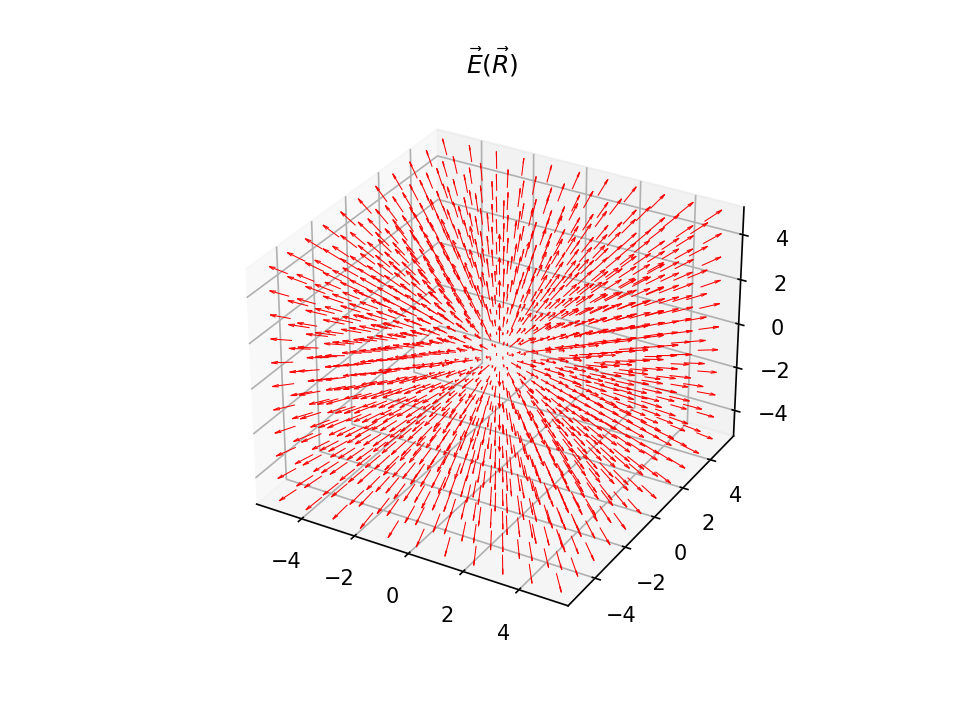

<IPython.core.display.Javascript object>


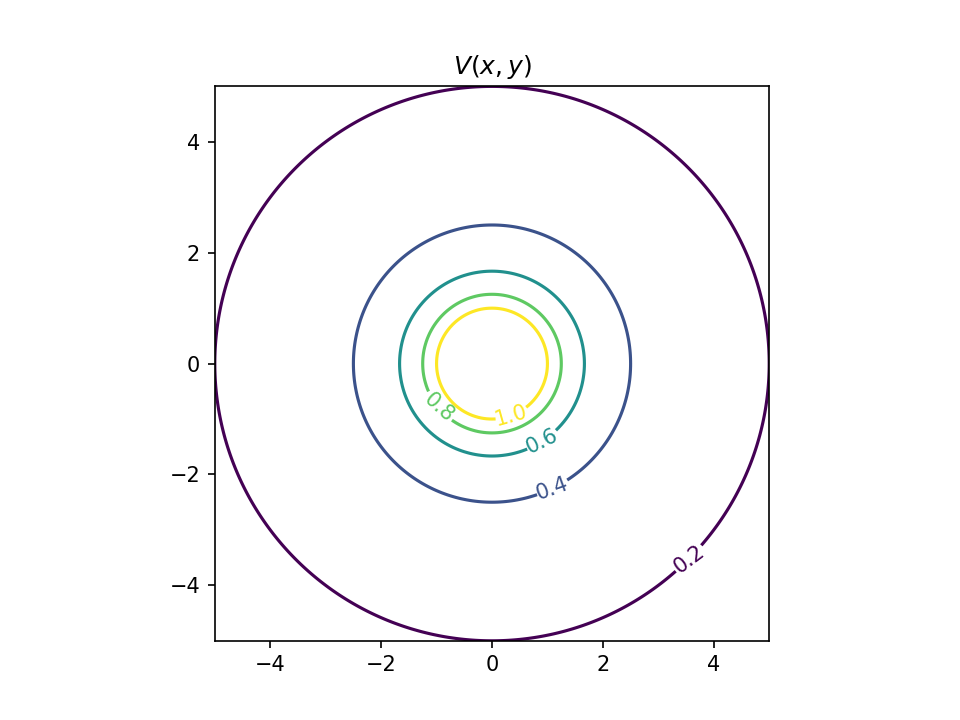

In [5]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
V = potential()
draw_field(X,Y,Z, Ex,Ey,Ez,stride=20)
draw_potential(X,Y,V,levels = [0.2,0.4,0.6,0.8,1])

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

<IPython.core.display.Javascript object>


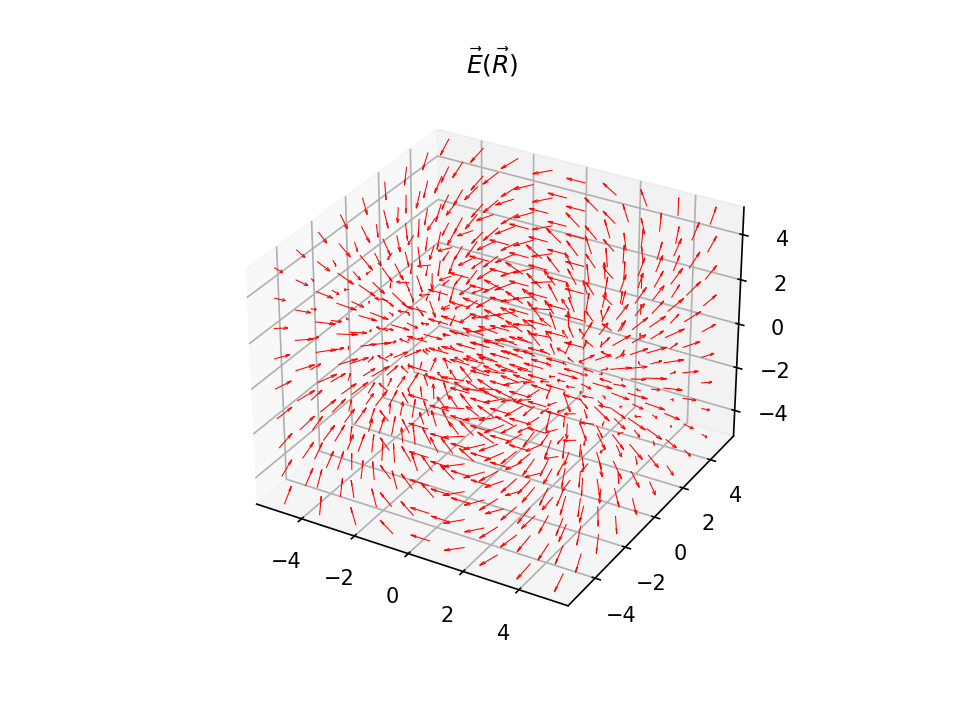

<IPython.core.display.Javascript object>


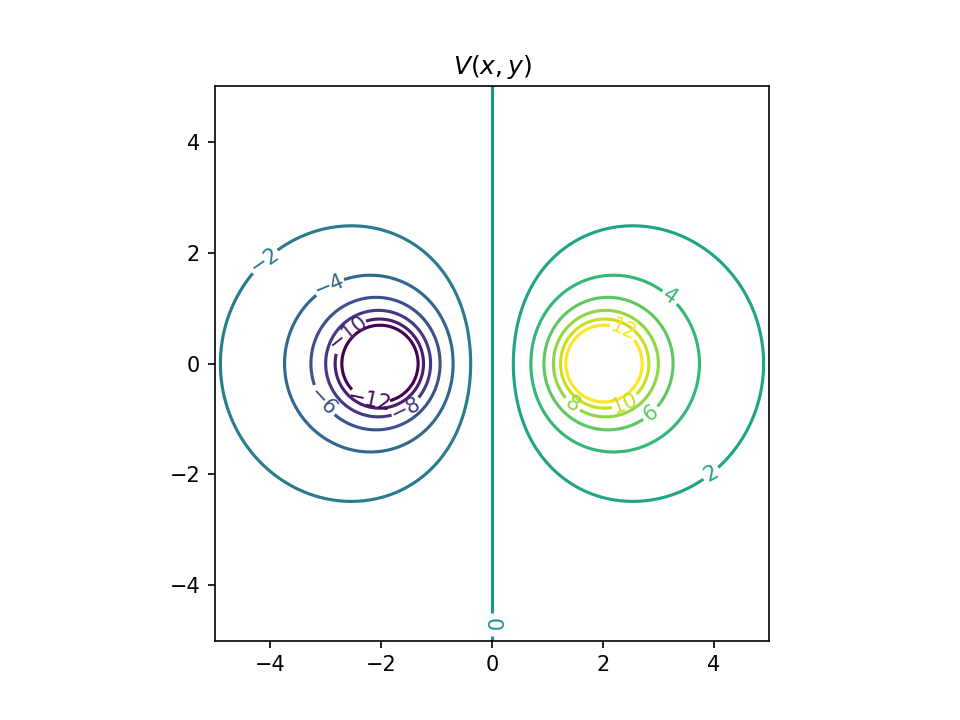

In [6]:
# Charge 1
q1 = +10
x1 = +2
y1 = 0
z1 = 0

# Charge 2
q2 = -10
x2 = -2
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2
V = V1 + V2

draw_field(X,Y,Z, Ex, Ey,Ez, stride=25)
draw_potential(X,Y,V,levels=[-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12])

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference? 

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [7]:
# Turn off interactive plotting for now.
#%matplotlib inline

In [8]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

def draw_potential_2d(x,y,v,levels = 10):
    x = X
    y = Y
    v = V
    
    fig, ax1 = plt.subplots(dpi=150)
    ax1.set_aspect("equal")
    ax1.set_title(r"$V(x,y)$")
    ax1 = plt.contour(x,y,v,levels)
    ax1.clabel()

Let's look at the field of a point charge located at the origin in this representation.

<IPython.core.display.Javascript object>


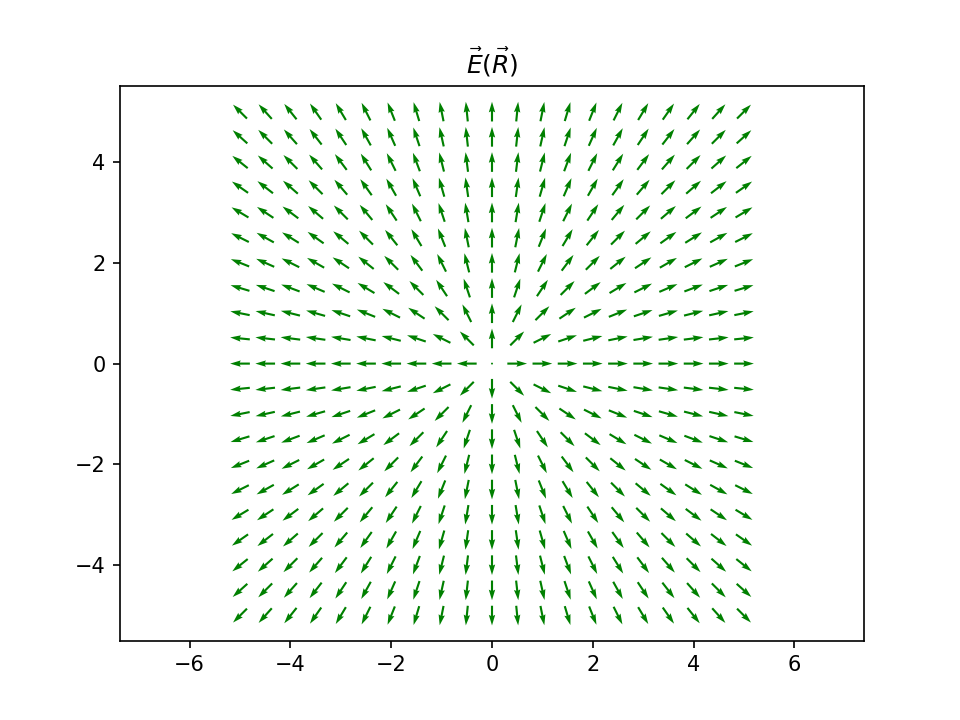

<IPython.core.display.Javascript object>


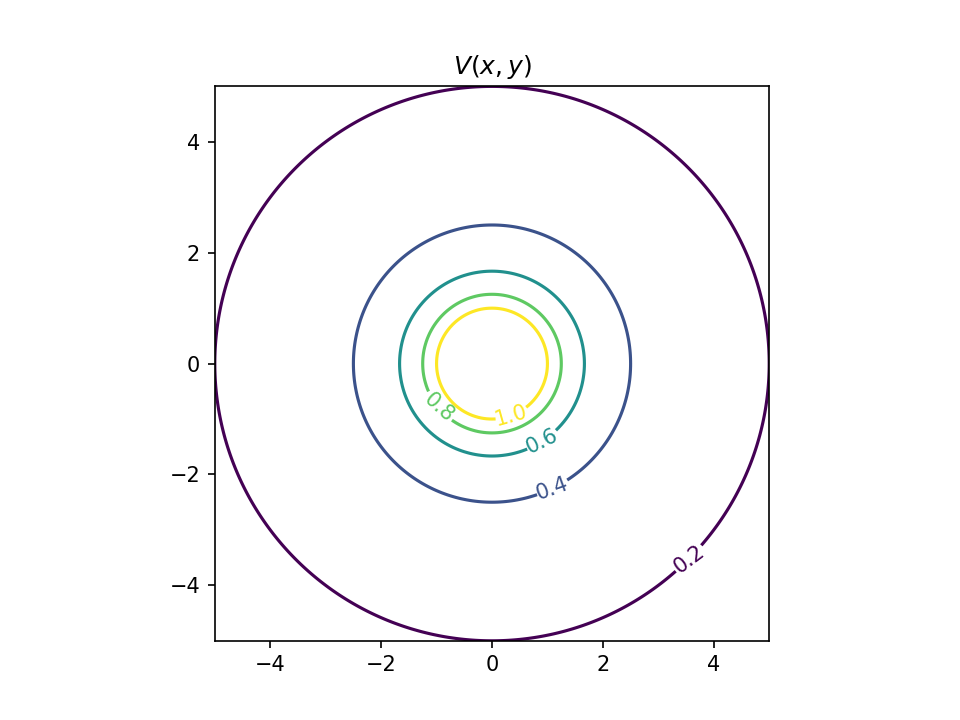

In [9]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
V = potential_2d()
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels=[0.2,0.4,0.6,0.8,1.0])

## Dipole

Change the values and locations of the charges below.

<IPython.core.display.Javascript object>


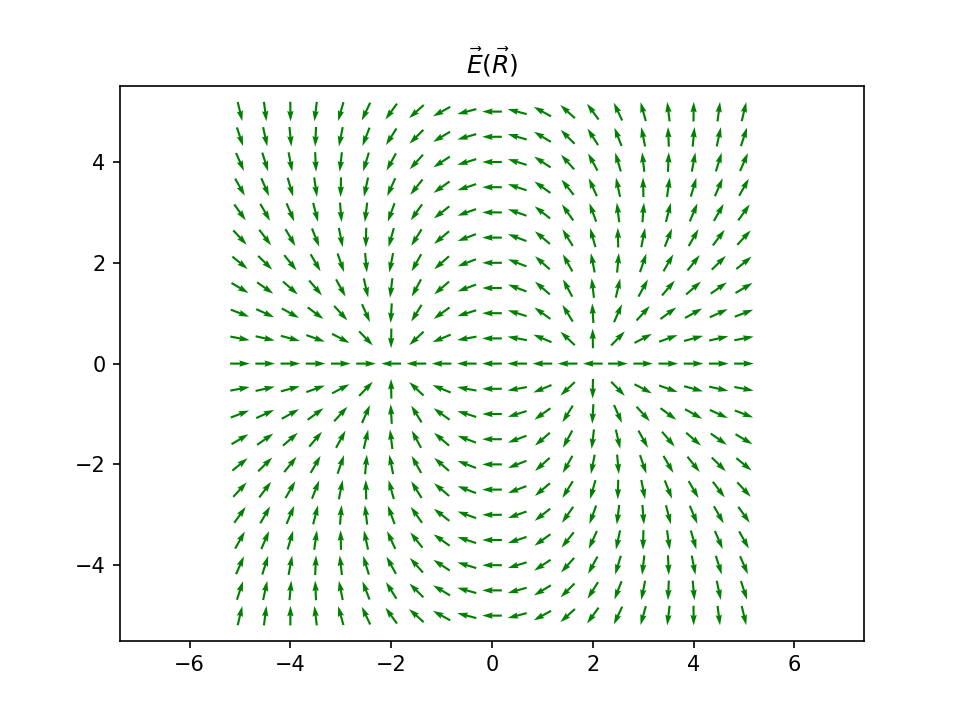

<IPython.core.display.Javascript object>


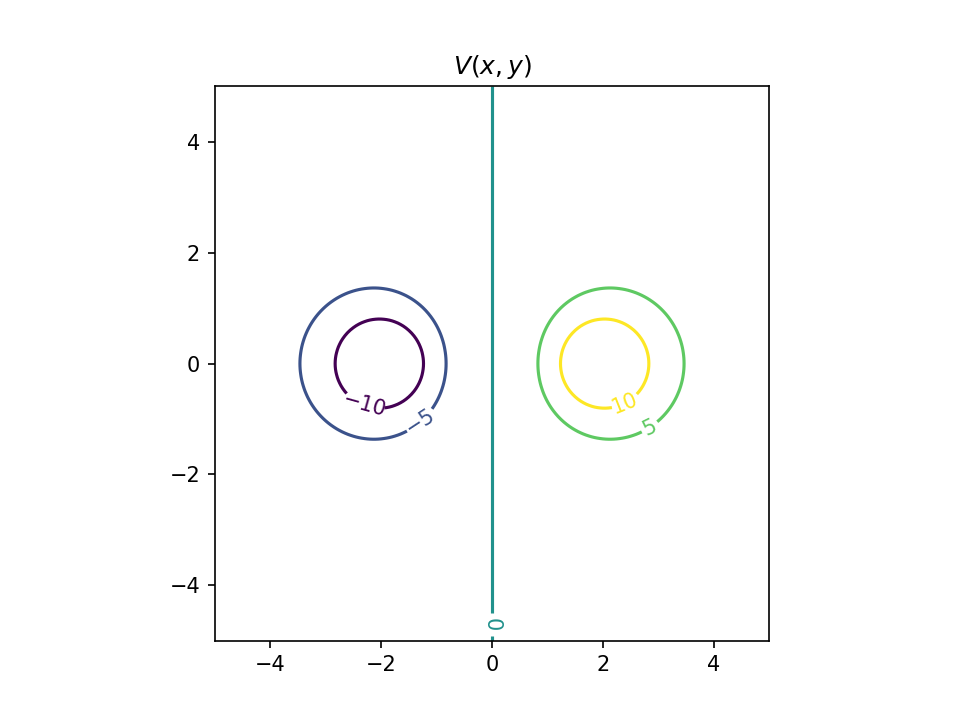

In [11]:
q1 = +10
x1 = +2
y1 = 0

q2 = -10
x2 = -2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V = V1+V2
draw_field_2d(X,Y,Ex,Ey,stride=10)
draw_potential_2d(X,Y,V,levels = [-10,-5,0,5,10])

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

<IPython.core.display.Javascript object>


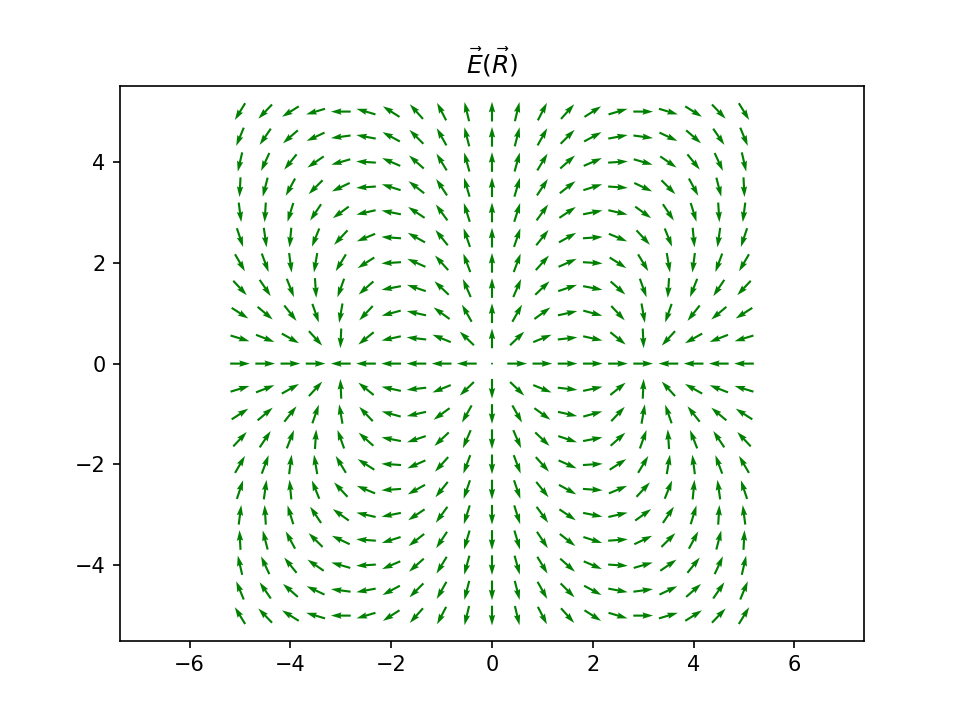

<IPython.core.display.Javascript object>


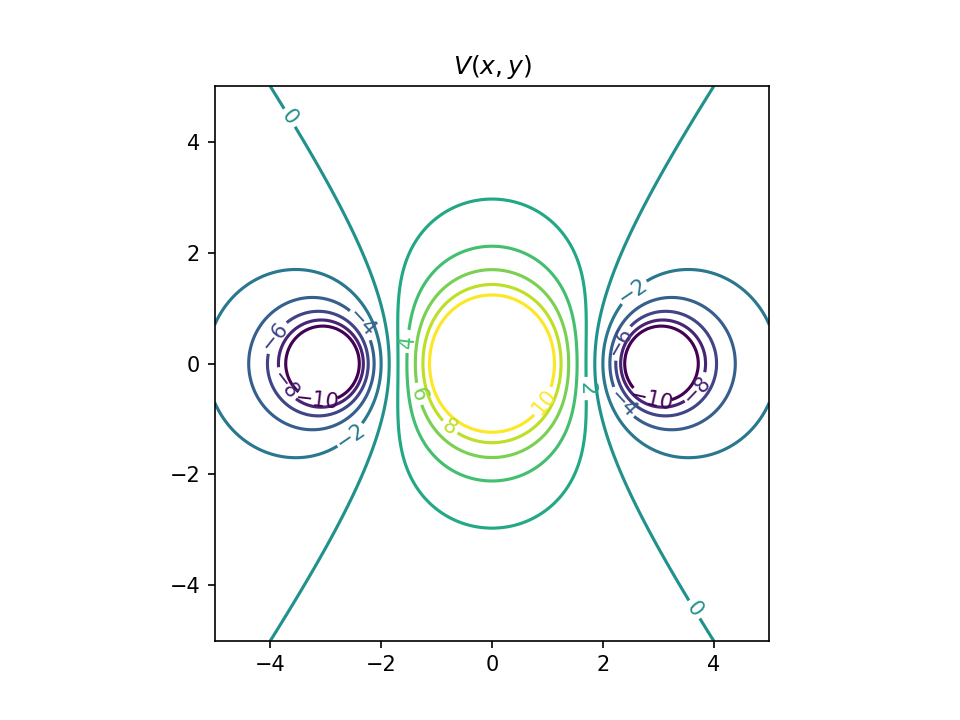

In [12]:
# (A) Two dipoles, pointing directly at each other.
q1 = -10
x1 = +3
y1 = 0

q2 = +20.0
x2 = 0
y2 = 0

q3 = -10
x3 = -3
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V = V1+V2+V3
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))

<IPython.core.display.Javascript object>


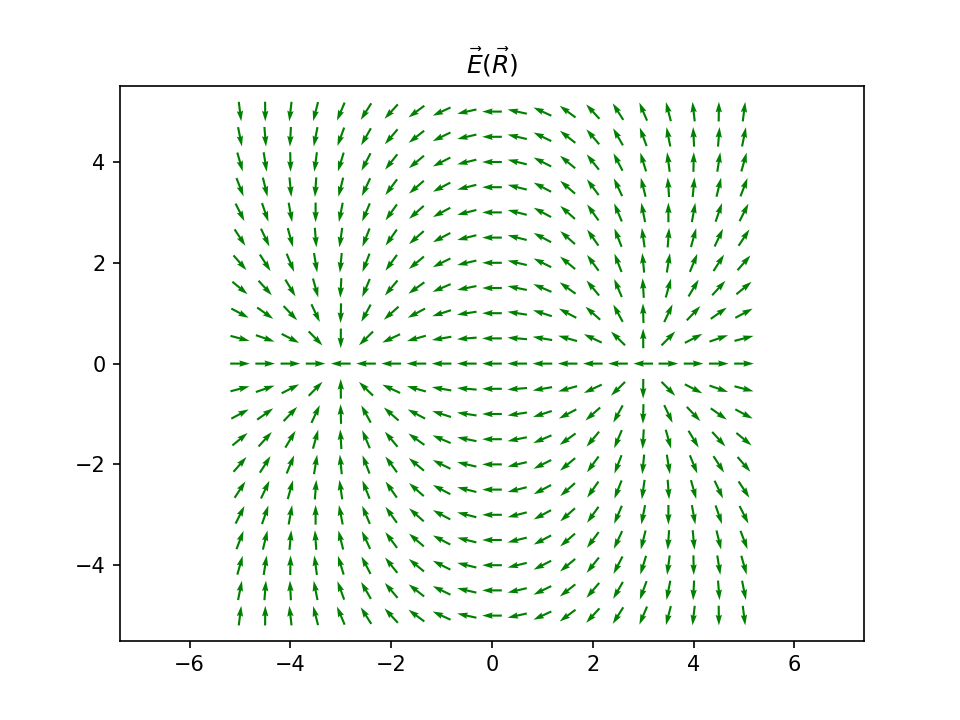

<IPython.core.display.Javascript object>


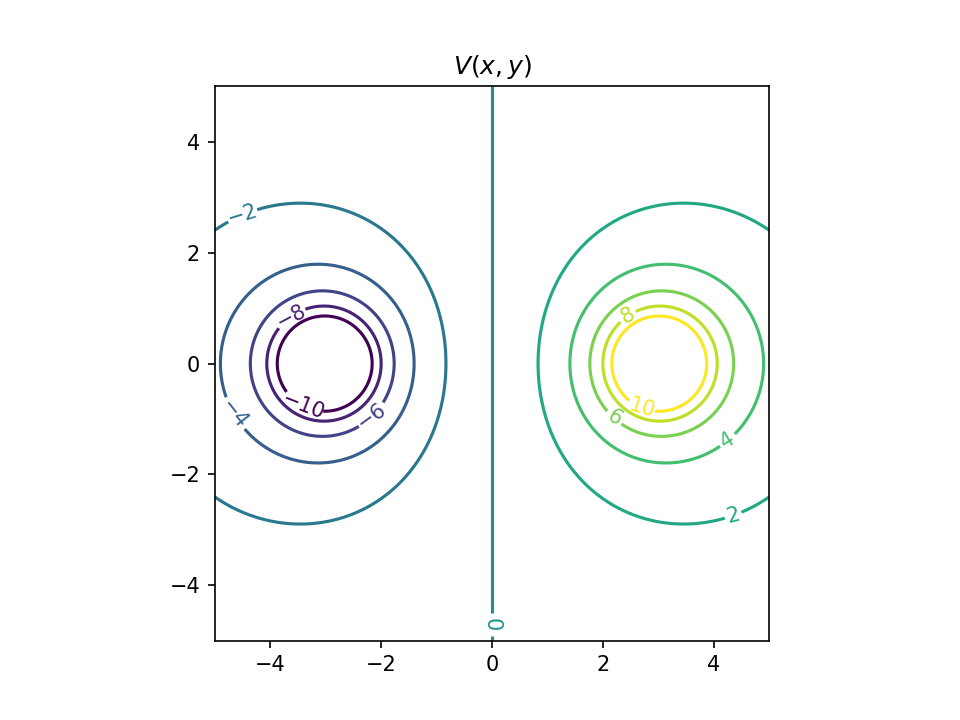

In [13]:
# (B) Two dipoles, end to end.
q1 = +10
x1 = +3
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -10
x3 = -3
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V = V1+V2+V3
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))

<IPython.core.display.Javascript object>


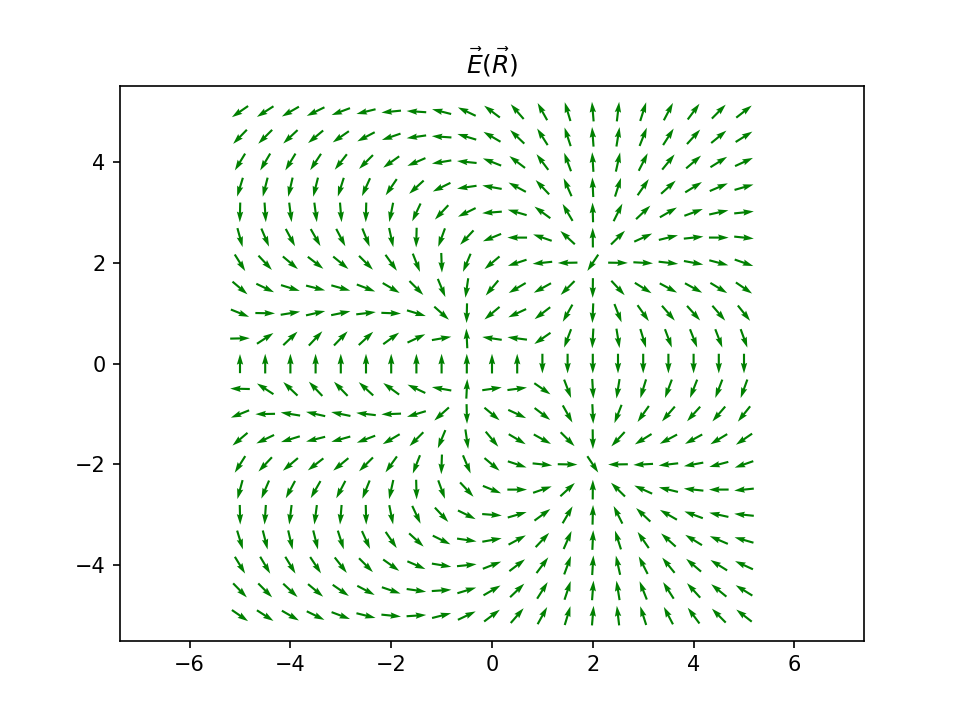

<IPython.core.display.Javascript object>


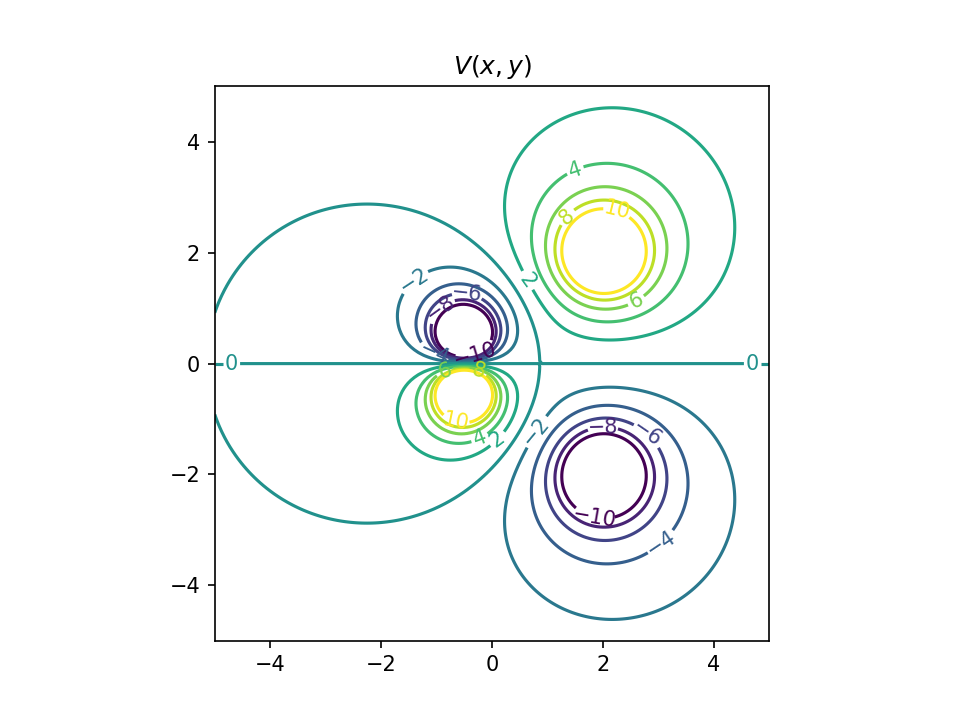

In [17]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +10
x1 = +2
y1 = +2

q2 = -10
x2 = +2
y2 = -2

q3 = -10
x3 = -0.5
y3 = +0.5

q4 = +10
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V4 = potential_2d(q4,(x4,y4))
V = V1+V2+V3+V4
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))

<IPython.core.display.Javascript object>


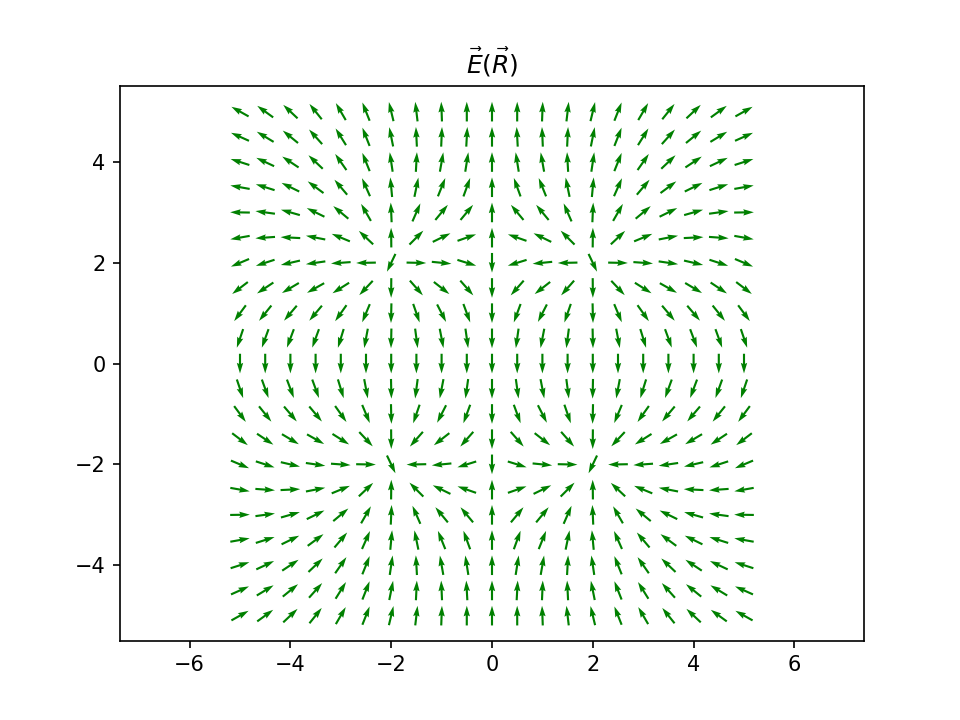

<IPython.core.display.Javascript object>


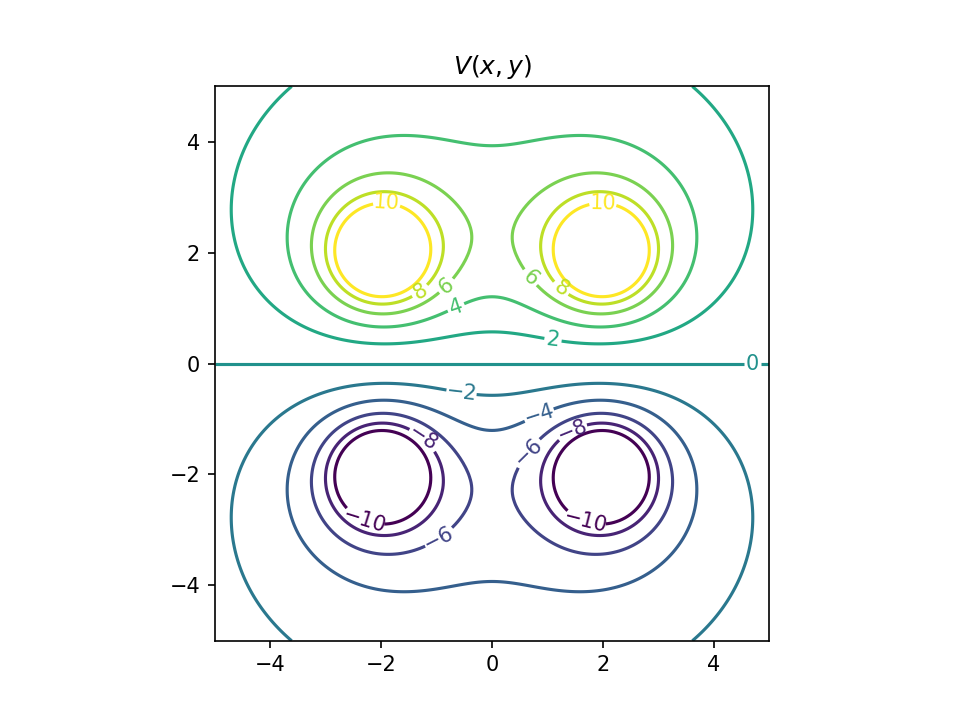

In [19]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +10
x1 = +2
y1 = +2

q2 = -10
x2 = +2
y2 = -2

q3 = +10
x3 = -2
y3 = +2

q4 = -10
x4 = -2
y4 = -2

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V4 = potential_2d(q4,(x4,y4))
V = V1+V2+V3+V4
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

<IPython.core.display.Javascript object>


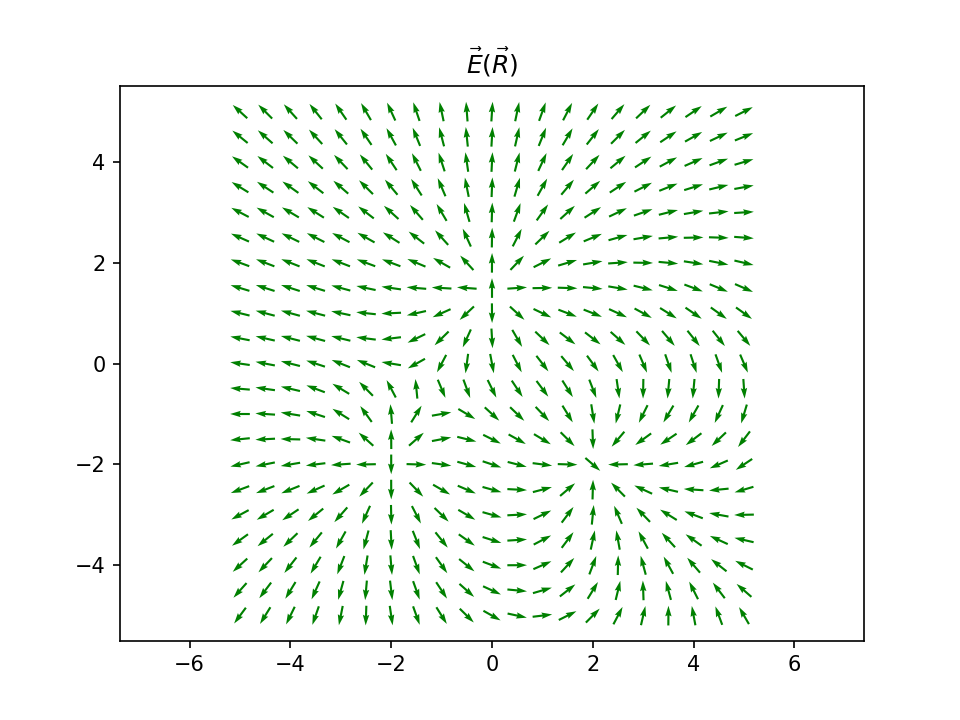

<IPython.core.display.Javascript object>


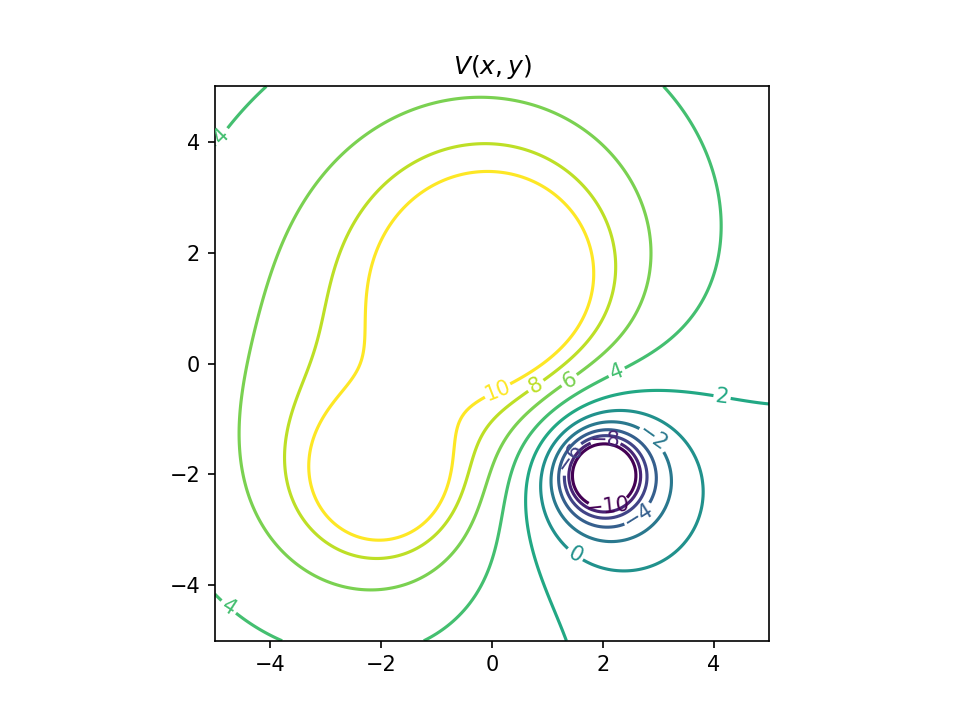

In [22]:
q1 = +10
x1 = -2
y1 = -2

q2 = -10
x2 = 2
y2 = -2

q3 = +20
x3 = 0
y3 = -2 + np.sqrt(12)

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V = V1+V2+V3
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))

What did you find?

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

<IPython.core.display.Javascript object>


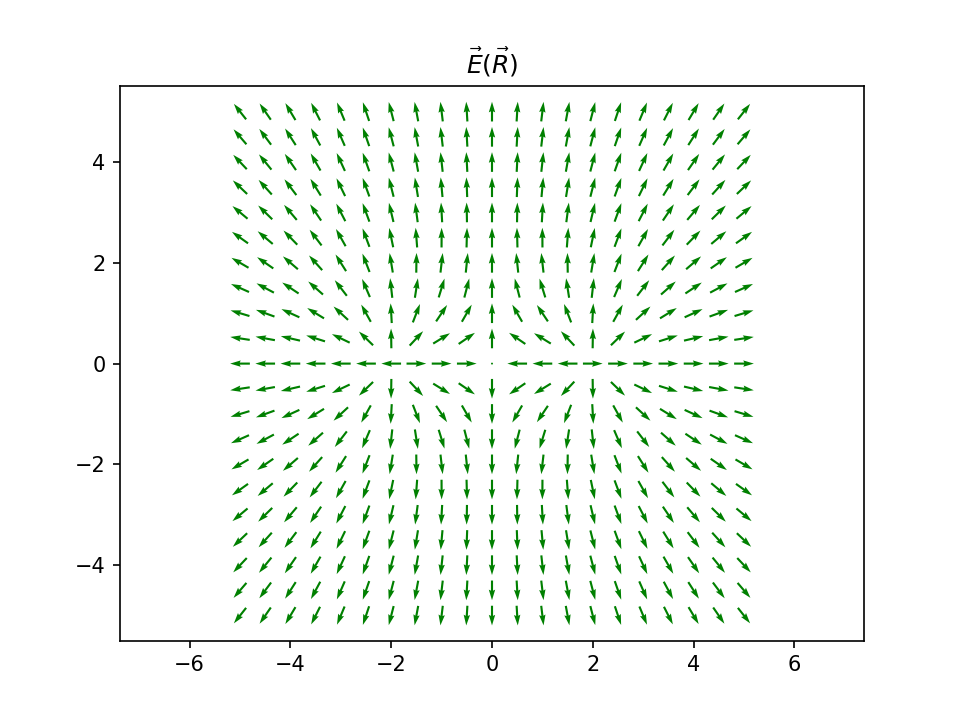

<IPython.core.display.Javascript object>


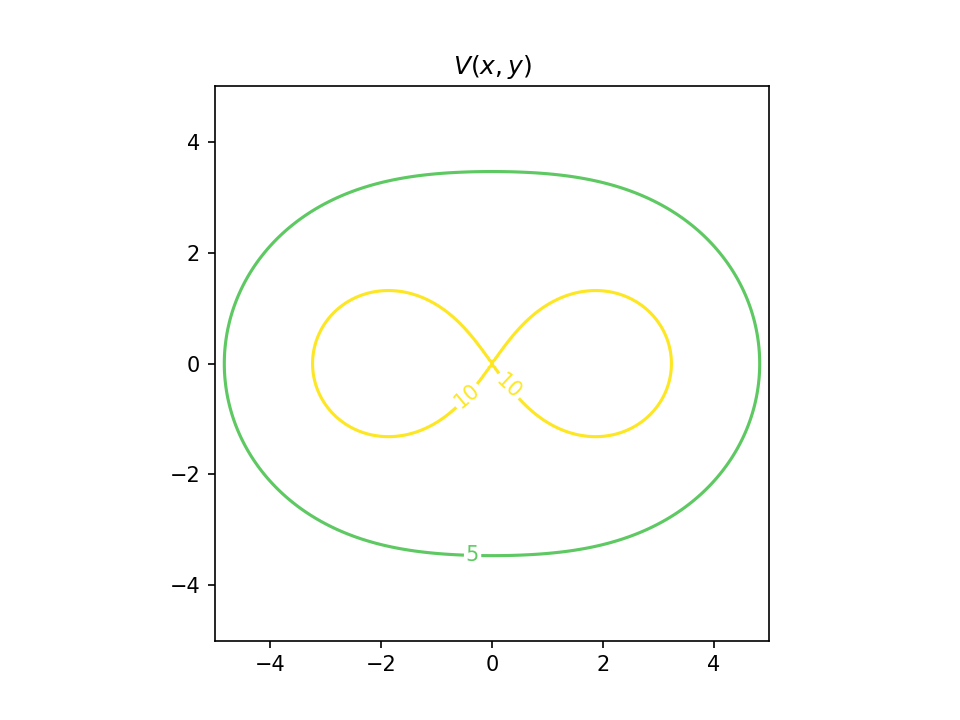

C:\Users\david.johnston\AppData\Local\Temp\ipykernel_24876\396427282.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


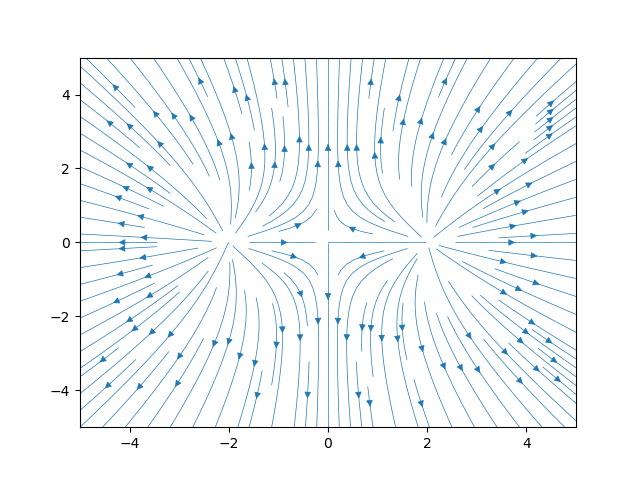

In [28]:
q1 = +10
x1 = +2
y1 = 0

q2 = +10
x2 = -2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V = V1+V2
draw_field_2d(X,Y,Ex,Ey,stride=10)
draw_potential_2d(X,Y,V,levels = [-10,-5,0,5,10])
fig = plt.figure()
ax = fig.add_subplot()
ax.streamplot(X.T,Y.T,Ex.T,Ey.T, linewidth=0.5, density=1.5)

<IPython.core.display.Javascript object>


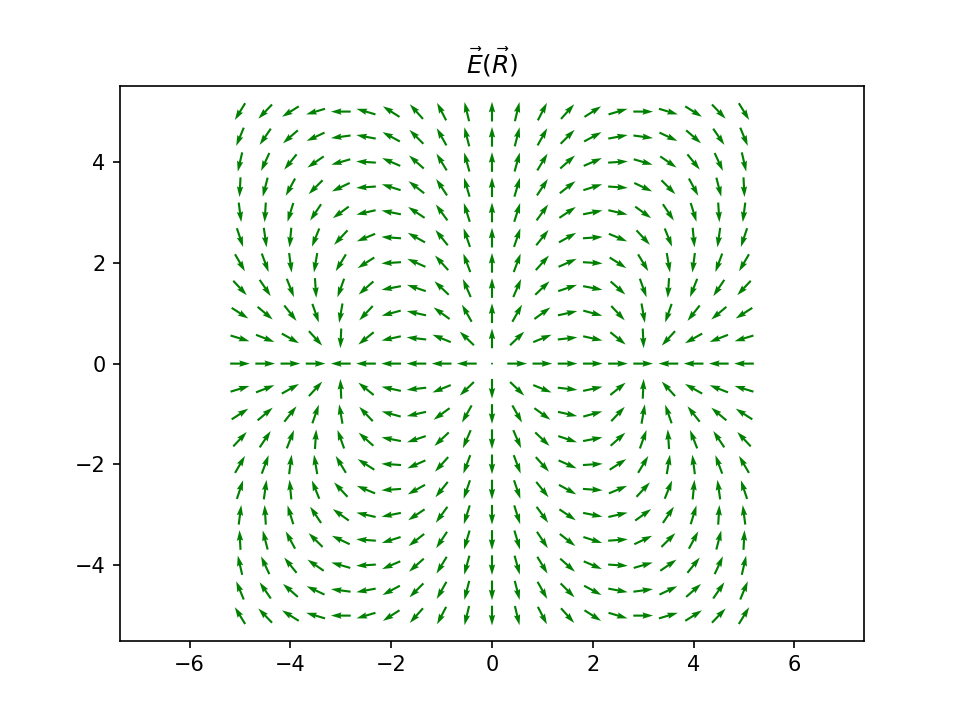

<IPython.core.display.Javascript object>


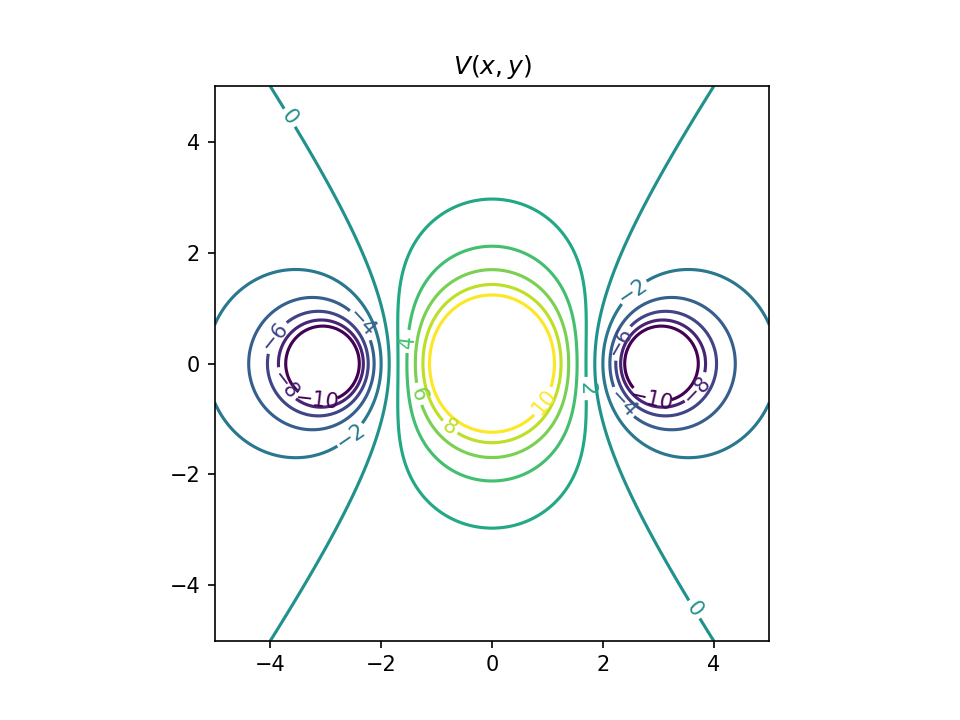

<IPython.core.display.Javascript object>


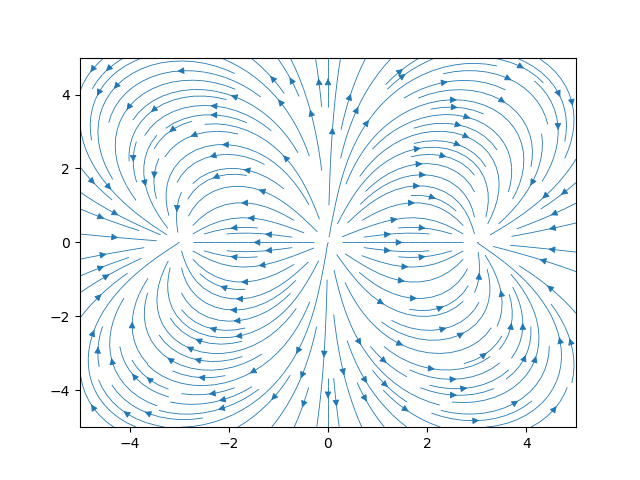

In [30]:
q1 = -10
x1 = +3
y1 = 0

q2 = +20.0
x2 = 0
y2 = 0

q3 = -10
x3 = -3
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
V1 = potential_2d(q1,(x1,y1))
V2 = potential_2d(q2,(x2,y2))
V3 = potential_2d(q3,(x3,y3))
V = V1+V2+V3
draw_field_2d(X,Y,Ex,Ey)
draw_potential_2d(X,Y,V,levels = np.linspace(-10,10,11))
fig = plt.figure()
ax = fig.add_subplot()
ax.streamplot(X.T,Y.T,Ex.T,Ey.T, linewidth=0.6, density=1.5)

Which representation seems most useful to you?  Why?

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!